In [2]:
from google.colab import files
uploaded=files.upload()

Saving Corona_NLP_test.csv to Corona_NLP_test.csv
Saving Corona_NLP_train.csv to Corona_NLP_train.csv


In [3]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, auc, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [5]:
data = pd.read_csv("Corona_NLP_train.csv",encoding="ISO-8859-1")


In [6]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [7]:
data.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [8]:
data.shape

(41157, 6)

In [9]:
data.dtypes

UserName          int64
ScreenName        int64
Location         object
TweetAt          object
OriginalTweet    object
Sentiment        object
dtype: object

PREPROCESSING THE DATA

In [10]:
data.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

Replacing all positive tweets with 1 and negative with 0

In [11]:
data.Sentiment.replace({'Positive':1,'Extremely Positive':1,'Negative':0,'Extremely Negative':0}, inplace=True)

Dropping Neutral tweets

In [12]:
data.drop(data[data['Sentiment']== 'Neutral'].index, inplace=True)


Converting Categorical to Numerical

In [14]:
data['Sentiment']= data['Sentiment'].astype(int)
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,1
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,1
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,1
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",0
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,1


In [15]:
X= data.OriginalTweet
X.head()

1    advice Talk to your neighbours family to excha...
2    Coronavirus Australia: Woolworths to give elde...
3    My food stock is not the only one which is emp...
4    Me, ready to go at supermarket during the #COV...
5    As news of the regionÂs first confirmed COVID...
Name: OriginalTweet, dtype: object

In [16]:
y= data.Sentiment.values
y[:5]

array([1, 1, 1, 0, 1])

In [17]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest= train_test_split(X,y,test_size=0.2,random_state=0)
print(xTrain.shape, xTest.shape, yTrain.shape, yTest.shape)

(26755,) (6689,) (26755,) (6689,)


MODELLING

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vector= CountVectorizer(stop_words='english')


In [19]:
trainFeat=vector.fit_transform([r for r in (xTrain)])
testFeat= vector.transform([r for r in (xTest)])


In [20]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(trainFeat,[int(a) for a in list(yTrain)])


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [21]:
predict= mnb.predict(testFeat)


EVALUATION AND VISUALISATION OF RESULTS


In [24]:
correct,incorrect=0,0
for i,j in enumerate(yTest):
  if j==predict[i]:
    correct+=1
  else:
    incorrect+=1
print('Correctly classified(Test): {:.2f}%'.format(correct/len(predict)*100))
print('Incorrectly classified(Test): {:.2f}%'.format(incorrect/len(predict)*100))

Correctly classified(Test): 79.14%
Incorrectly classified(Test): 20.86%


IMPROVING EFFICIENCY

In [27]:
pred_train= mnb.predict(trainFeat)
correct,incorrect=0,0
for i,j in enumerate(yTrain):
  if j==pred_train[i]:
    correct+=1
  else:
    incorrect+=1
print('Correctly classified(Train): {:.2f}%'.format(correct/len(pred_train)*100))
print('Incorrectly classified(Test): {:.2f}%'.format(incorrect/len(pred_train)*100))

Correctly classified(Train): 91.41%
Incorrectly classified(Test): 8.59%


In [28]:
fpr,tpr,thresholds= roc_curve(yTest,predict,pos_label=1)
print("AUC of the predictions: {0}".format(auc(fpr,tpr)))

AUC of the predictions: 0.7886400025788154


VISUALIZATION OF RESULT

Text(0.5, 0, 'FPR')

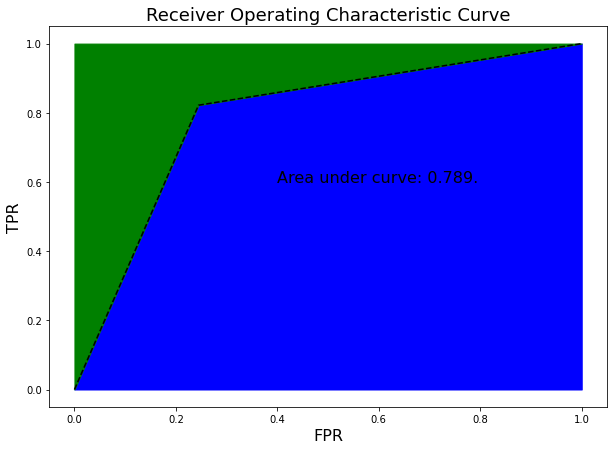

In [29]:
fig,ax= plt.subplots(figsize=(10,7))
ax.plot(fpr,tpr,'k--')
area= 'Area under curve: {:.3f}.'.format(roc_auc_score(yTest,predict))
ax.annotate(area, xy=(0.4,0.6),fontsize=16)
plt.fill_between(fpr,tpr,color='b')
plt.fill_between(fpr,tpr, np.max(tpr), color='g')
plt.title('Receiver Operating Characteristic Curve', fontsize=18)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)